# Risk Assessment due to flood 
**Risk** is defined as hazard times damage(consequence). The **hazard** is the physical and statistical aspects of the flood, which is generally expressed in exceedance probability. The **damage** is the exposure of people or assets to a hazard along with its susceptibility to suffer from damage during flood event.
Mathematically, 
$$Risk = hazard*consequence = hazard*exposure*vulnerability$$

## Defining Hazard
The hazard is the statistical ascept of flood. With the observed data of the peak flood or rainfall, we try to find the best probability distribution function that fits to our observation. In our case, the recorded rainfall were fitted with a) Normal Distribution, b) Log normal distribution, c) Weibull distribution, d) Gamma distribution and e)Type 1 Extreme Value Distribution (Gumbel). the observed rainfall data fitted best with log-normal distribution in our study, shown in figure below: 
![A](Markdown\comparison_exceedance_log.png)

From the study, the log normal distribution with parameters, $\mu =4.1245$ and $\sigma =0.264$ was found best suited to our case. 

## Damage Assessment 
This steps includes deriving the damage curve. For our case, damage was assumed to be depended upon the water depth due to rainfall event. Hence, with the observed values of inundation depth(cm) and damage caused by it (Euro), the relation between these variables were tried to model. Firstly, we check how much these parameters are correlated. We found correlation coefficient, $r=0.845$ between damage and depth. 

Then, we try to fit the data into different models, namely a) Linear, b)log-linear, c)square root and d) power transform models. Our data fits best to the power transform model with parameters a and b equals to 3993 and 0.5076 respectively. 
![B](Damage_Comparison.png)

Hence, the damage curve in our case is represented by \
$Damage = 3993*Depth^{0.5076}$.

## Risk Quantification
In this process, we want to derive the risk associated with each exceedance probability. That means, we try to generate the graph that relates the damage calculated in step 1.2 with the exceedance probability of the event. The overall step is shown in figure below:
![C](Markdown\Overall.jpg)

### Expected annual damage (EAD)
EAD is not the expected damage that will occur but is the average of flood damages calculated over a number of events. The total damages for each event is then multiplied by the event probability to get the expected annual damage.

The expected annual damage does not help to quantify the actual risk with high degree of certainty. However, they are good metrics to compare different flood mitigation measures. 

**How to find the expected annual damage?**\
1) For different return period, we can calculate the corresponding rainfall intensity using log normal distribution (1.1) . \
2) The inundation depth occuring due to certain rainfall intensity is calculated assuming the following distribution:\
$\mathrm{w}(cm) = \begin{cases}
    0.75*(i-30) & \text{if } i > 30 mm/hr \\ % & is your "\tab"-like command (it's a tab alignment character)
    0 & \text{else.}
\end{cases}$\
3) The corresponding damage for each inundation depth can hence be calculated using power equation(1.2).\
4) The damage vs the exceedance probability gives the risk curve.\
5) The EAD can be calculated from the area of risk curve. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

**Paramaters of log normal distribution and damage curve**

In [2]:
#Parameters of log normal distribution
sigma = 0.264574848004627
mu = 4.124545236936973
# Damage Curve Parameters from Power function
a = 3993
b = 0.5076

**We are assessing EAD considering the damage caused by 2,10,50,100 and 300 years return period rainfall event.** \
The exceedance probability for certain return period is inverse of the return period and while cummulative distribution function or non-exceedance probability is the 1 minus exceedance probability. \
The rainfall intensity corresponding to the return period can be calculated from stats.lognorm of scipy module. But process is slight different than MATLAB due to its parametrization technique. Please read this (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)

In [3]:
#return period, exceedance and non exceedance probability
return_period = np.array([2,10,50,100,300])
exceedance_prob = 1/return_period
non_exceedance_prob = 1 - exceedance_prob
# Rainfall intensities corresponding to our return period
rainfall_return=stats.lognorm(s=sigma, scale=np.exp(mu)).ppf(non_exceedance_prob)

#Just for tabular output
dataset = pd.DataFrame({'return period': return_period, 'rainfall(mm/h)': rainfall_return}, columns=['return period', 'rainfall(mm/h)'])
print(dataset)

   return period  rainfall(mm/h)
0              2       61.839680
1             10       86.800428
2             50      106.475567
3            100      114.438593
4            300      126.766971


**Step by Step Curve Plotting**\
Since, in our case only intensity greater than 30mm/h results in inundation, we consider only intensities greater than it. 

Text(0.5, 1.0, 'Rainfall Intensity Distribution')

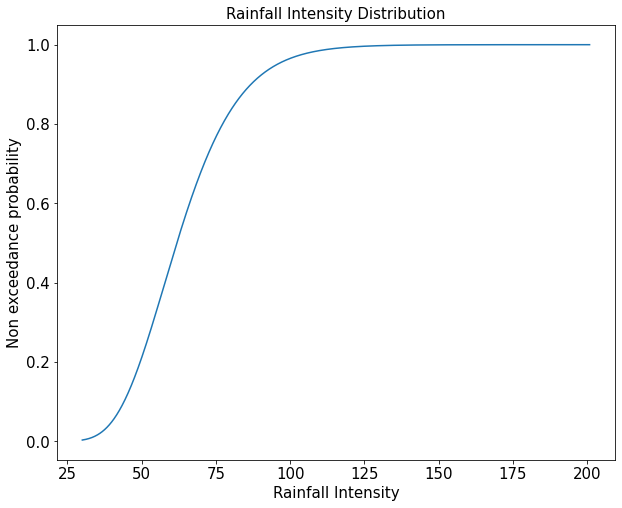

In [4]:
# PLotting rainfall vs exceedance probability: log normal

#Array Initialisation for intensities greater than 30 and less than 200. (voluntarily taken limit)
i = np.arange(30, 201, 0.1)

#Compute cdf of each rainfall intensity (log normal)
p = stats.lognorm.cdf(i, s=sigma, scale=np.exp(mu))

#Plotting intensity and corresponding cdf
plt.figure(figsize=[10, 8])
plt.plot(i, p)
plt.xlabel('Rainfall Intensity', fontsize=15)
plt.ylabel('Non exceedance probability', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Rainfall Intensity Distribution', fontsize=15)

Text(0.5, 1.0, 'Rainfall Intensity Distribution')

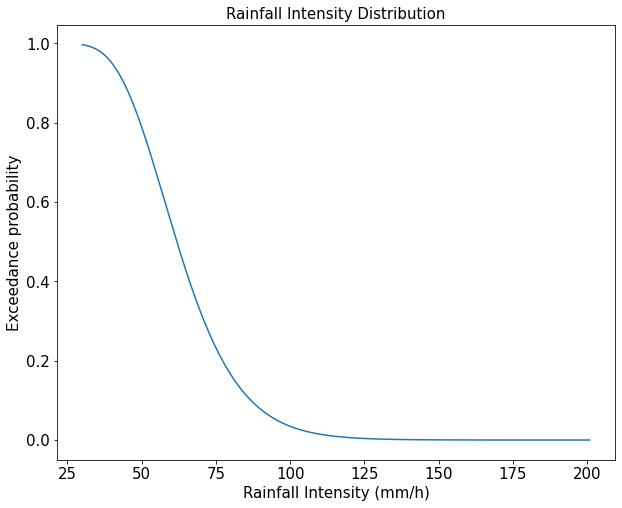

In [5]:
#Plotting intensity and exceedance probability
plt.figure(figsize=[10, 8])
plt.plot(i, 1 - p)
plt.xlabel('Rainfall Intensity (mm/h)', fontsize=15)
plt.ylabel('Exceedance probability', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Rainfall Intensity Distribution', fontsize=15)

In [6]:
#calculating depth
depth_exact = 0.75*(i-30)

In [7]:
#Damage
damage_exact = a*np.power(depth_exact,b)

Text(0.5, 1.0, 'Damage Curve')

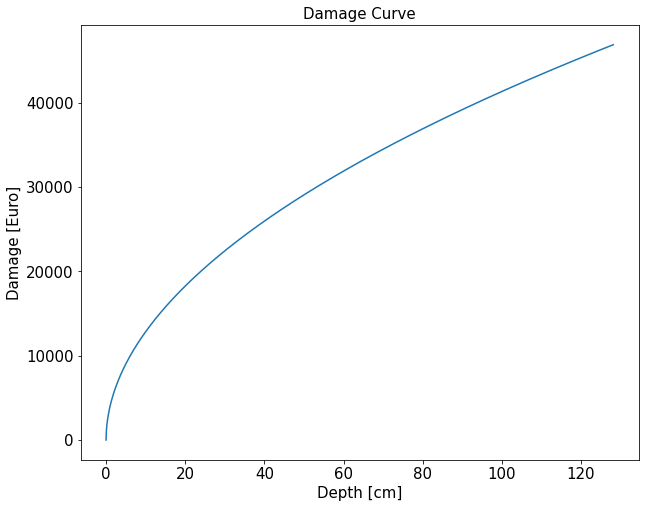

In [9]:
plt.figure(figsize=[10, 8])
plt.plot(depth_exact,damage_exact)
plt.xlabel('Depth [cm]', fontsize=15)
plt.ylabel('Damage [Euro]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Damage Curve', fontsize=15)

Text(0.5, 1.0, 'Risk Curve')

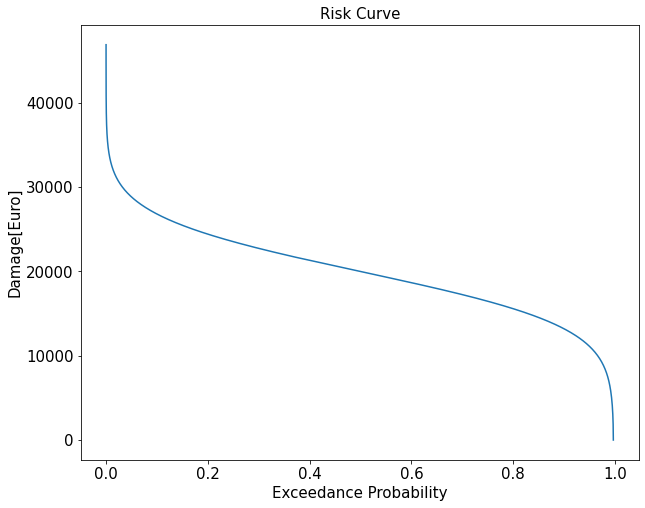

In [11]:
#Ploting Risk Curve
plt.figure(figsize=[10, 8])
plt.plot(1-p,damage_exact)
plt.xlabel('Exceedance Probability', fontsize=15)
plt.ylabel('Damage[Euro]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Risk Curve', fontsize=15)

**Now we want to quantify EAD for default scenario i.e without any flood prevention measures.**

In [33]:
# Default scenario
depth_default = 0.75*(rainfall_return-30)
damage_default = a*np.power(depth_default,b)
print(depth_default)
print(damage_default)

[23.87976034 42.60032068 57.3566754  63.32894464 72.57522834]
[19988.82748701 26815.70888117 31185.77443988 32793.86561293
 35142.73094801]


The EAD is calculated from the area of the risk curve. There are different method to calculate the area based on discretization.\
The first method explored here is **general trapezoidal method.**
![e](Markdown\general_trap.jpg)

In [13]:
#Function to calculate EAD by general trapezoidal rule
def general_trap(exceedance_prob,damage):
    avg = (damage[0:4]+damage[1:5])/2
    EAD = np.sum(avg*np.diff(-exceedance_prob))
    return(EAD)

In [14]:
#call function
general_trap(exceedance_prob,damage_default)

12227.320128612588

**The second method for area approximation is Improved Trapezoidal Method**
![f](Markdown\improved_trap.jpg)

In [15]:
#Function to calculate EAD by improved trapezoidal rule
def improved_trap(exceedance_prob,damage):
    return(exceedance_prob[-1]*damage[-1])+general_trap(exceedance_prob,damage)

In [16]:
#Function call
improved_trap(exceedance_prob,damage_default)

12344.46256510594

**The third method for calculating the area under risk curve is step method.**
![g](Markdown\step.jpg)

In [17]:
#Function to calculate EAD by step method
def step(exceedance_prob,damage):
    return np.sum(np.diff(-exceedance_prob)*damage[0:4])

In [18]:
#Calling function step
step(exceedance_prob,damage_default)

10671.27122044903

In [19]:
#Defining function:exact
def exact(exceedance_prob,damage):
    return np.sum(exceedance_prob*damage)

In [20]:
#calling Function:exact
exact(1-p,damage_exact)

5119838.790106598

**We consider second scenario, flood protection upto 50 cm**\
Here, the depth of water in each scene is reduced by 50 cm and also there are no damage upto 50 cm inundation. That means risk is zero when inundation is less than 50 cm. 

In [21]:
# New flood depth for exact flow scenario2
depth_new = np.zeros(len((depth_exact)))
for i in range(len(depth_exact)):
    if depth_exact[i] > 50:
        depth_new[i] = depth_exact[i] - 50
    else:
        depth_new[i] = 0

In [22]:
#Damage
damage_new= a*np.power(depth_new,b)

In [23]:
# New flood depth for EAD approximation
depth_scene2 = np.zeros(len((depth_default)))
for i in range(len(depth_default)):
    if depth_default[i] > 50:
        depth_scene2[i] = depth_default[i] - 50
    else:
        depth_scene2[i] = 0

In [34]:
#Damage_scene2
damage_scene2 = a*np.power(depth_scene2,b)
print(damage_scene2)

[    0.             0.         10995.80139771 14867.76335666
 19426.8769977 ]


In [25]:
#EAD approximations by different metho for scenario 2
print(general_trap(exceedance_prob,damage_scene2))
print(improved_trap(exceedance_prob,damage_scene2))
print(step(exceedance_prob,damage_scene2))

683.4653475279108
748.2216041869085
209.07643635479985


In [26]:
#Exact EAD for scenario 2
exact(1-p,damage_new)

56087.298900422844

**Lastly considering the scenario 3, in which damage is reduced by 15%**
Here, the coefficient of the damage curve decreases by 15 percent.
'a' is the coefficient of damage curve for other cases. For this scenario, it will be 0.85 times a. 

In [27]:
a_new = 0.85*a

In [28]:
#Damage_Scene3 for exact calculation
damage_new_3 = a_new*np.power(depth_exact,b)

In [35]:
#Damage for certain return periods for EAD approximation
damage_scene3 = a_new*np.power(depth_default,b)
print(damage_scene3)

[16990.50336396 22793.352549   26507.9082739  27874.78577099
 29871.3213058 ]


In [30]:
#EAD approximations by different metho for scenario 3
print(general_trap(exceedance_prob,damage_scene3))
print(improved_trap(exceedance_prob,damage_scene3))
print(step(exceedance_prob,damage_scene3))

10393.222109320703
10492.793180340052
9070.580537381673


In [31]:
#Exact EAD for scenario 3
exact(1-p,damage_new_3)

4351862.971590609

***This code is prepared with the aid of material from Dr. Karl Broich, TUM.***